# Random Forest Classifier:

Testuen sailkapena gaika:
* Gizartea --> 0
* Politika --> 1
* Kirola --> 2
* Zientzia eta teknologia --> 3
* Ekonomia --> 4
* Historia --> 5
* Geografia --> 6

This classifier is based on using several decision trees. Each tree analyse random data and features from the database. Therefore, after a final voting, the classification is done with several models/trees:

<img src="Figures/Random-forest.png" alt="Random Forest" width="50%"/>


In [1]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [2]:
with open('Data def/X_train.bin', 'rb') as f:
    X_train = np.load(f)
with open('Data def/X_test.bin', 'rb') as f:
    X_test = np.load(f)
with open('Data def/y_train.bin', 'rb') as f:
    y_train = np.load(f)
with open('Data def/y_test.bin', 'rb') as f:
    y_test = np.load(f)
class Dataset:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
data = Dataset(X_train, X_test, y_train, y_test)

In [3]:
def score(data, model):
    y_pred = model.predict(data.X_test)
    return accuracy_score(data.y_test, y_pred)
    
@ignore_warnings(category=ConvergenceWarning)
def fit_score(data, model):
    model.fit(data.X_train, data.y_train)
    return score(data, model)

In [4]:
@ignore_warnings(category=ConvergenceWarning)
def search_hyperparameters(data, model, param_grid, cv=5, verbose=0):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=cv,scoring='accuracy',verbose=verbose
    )
    grid_search.fit(data.X_train,data.y_train)
    return grid_search

Ref{https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html}

**criterion** {“gini”, “entropy”, “log_loss”}, default=”gini”

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation. Note: This parameter is tree-specific.

**max_depth**: int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [31]:
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'], 
    'max_depth' : [10, 15, 20]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................criterion=gini, max_depth=10; total time=  22.5s
[CV] END .......................criterion=gini, max_depth=10; total time=  22.4s
[CV] END .......................criterion=gini, max_depth=10; total time=  22.4s
[CV] END .......................criterion=gini, max_depth=10; total time=  22.5s
[CV] END .......................criterion=gini, max_depth=10; total time=  22.3s
[CV] END .......................criterion=gini, max_depth=15; total time=  27.5s
[CV] END .......................criterion=gini, max_depth=15; total time=  27.5s
[CV] END .......................criterion=gini, max_depth=15; total time=  27.5s
[CV] END .......................criterion=gini, max_depth=15; total time=  27.3s
[CV] END .......................criterion=gini, max_depth=15; total time=  27.2s
[CV] END .......................criterion=gini, max_depth=20; total time=  29.7s
[CV] END .......................criterion=gini, m

In [27]:
model = RandomForestClassifier(random_state=42, criterion = 'entropy', max_depth = 15) 
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')

Accuracy: 85.4%


In [28]:
model = RandomForestClassifier(random_state=42) 
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')

Accuracy: 86.2%


In [29]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [None]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....................criterion=gini, max_depth=None; total time=  32.3s
[CV] END .....................criterion=gini, max_depth=None; total time=  32.5s
[CV] END .....................criterion=gini, max_depth=None; total time=  32.4s
[CV] END .....................criterion=gini, max_depth=None; total time=  32.3s
[CV] END .....................criterion=gini, max_depth=None; total time=  31.4s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': None}
grid_search.best_score_ = np.float64(0.8436985400032009)


In [32]:
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 15}
grid_search.best_score_ = np.float64(0.8469041310262657)


**Default:**

'criterion': 'gini',

'max_depth': If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


In [29]:
model = RandomForestClassifier(random_state=42) 
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')

Accuracy: 86.2%


### Ereduaren probakdef sailkapena(esaldi, model):


In [30]:
def sailkapena(esaldi, model):
    pred = model.predict(esaldi)
    match pred[0]:
        case 0.0:
            return("Gizartea")
        case 1.0:
            return("Politika")
        case 2.0:
            return("Kirola")
        case 3.0:
            return("Zientzia eta teknologia")
        case 4.0:
            return("Ekonomia")
        case 5.0:
            return("Historia")
        case 6.0:
            return("Geografia")

In [31]:
with open('Data def/hegoafrika.bin', 'rb') as f:
    esaldia_g = np.load(f)
#"Hegoafrikan ardo ona egiten omen da Stellenbosch aldean. Lurmutur hiria, Pretoria, hiri handiak ere topa daitezke"
with open('Data def/altuna.bin', 'rb') as f:
    esaldia_k = np.load(f)
# "Pilotan Altuna III. atera da garaile, Iñaki Artola 22-19 garaitu ondoren. Bi gipuzkoarrek urte luzeetan ahaztuko ez dugun erakustaldia eman ziguten."

In [ ]:
model = RandomForestClassifier(random_state=42, criterion = 'entropy', max_depth = None) 
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')

In [32]:
print(sailkapena(esaldia_g,model))
print(sailkapena(esaldia_k,model))

Gizartea
Kirola


### Adierazpen grafikoa

In [39]:
model = RandomForestClassifier(random_state=42, criterion = 'entropy', max_depth = None) 
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')
sakonerak = [zuhaitz.tree_.max_depth for zuhaitz in model.estimators_]


print(f"Max depth: {np.max(sakonerak)}")
print(f"Min depth: {np.min(sakonerak)}")
print(f"Mean depth: {np.mean(sakonerak):.2f}")
print(f"Mediana: {np.median(sakonerak)}")
print(f"Standard deviation: {np.std(sakonerak):.2f}")

Accuracy: 85.8%
Max depth: 20
Min depth: 14
Mean depth: 15.57
Mediana: 15.0
Standard deviation: 1.07


In [40]:
model = RandomForestClassifier(random_state=42, criterion = 'entropy', max_depth = 20) 
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')
sakonerak = [zuhaitz.tree_.max_depth for zuhaitz in model.estimators_]


print(f"Max depth: {np.max(sakonerak)}")
print(f"Min depth: {np.min(sakonerak)}")
print(f"Mean depth: {np.mean(sakonerak):.2f}")
print(f"Mediana: {np.median(sakonerak)}")
print(f"Standard deviation: {np.std(sakonerak):.2f}")

Accuracy: 85.8%
Max depth: 20
Min depth: 14
Mean depth: 15.57
Mediana: 15.0
Standard deviation: 1.07


In [42]:
params = {
    'criterion' : ['entropy'], 
    'max_depth' : [10]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................criterion=entropy, max_depth=10; total time=  42.0s
[CV] END ....................criterion=entropy, max_depth=10; total time=  42.3s
[CV] END ....................criterion=entropy, max_depth=10; total time=  42.3s
[CV] END ....................criterion=entropy, max_depth=10; total time=  42.1s
[CV] END ....................criterion=entropy, max_depth=10; total time=  42.0s
grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 10}
grid_search.best_score_ = np.float64(0.8406807390678072)


In [56]:
params = {
    'criterion' : ['entropy'], 
    'max_depth' : [12]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................criterion=entropy, max_depth=12; total time=  43.9s
[CV] END ....................criterion=entropy, max_depth=12; total time=  44.1s
[CV] END ....................criterion=entropy, max_depth=12; total time=  44.2s
[CV] END ....................criterion=entropy, max_depth=12; total time=  43.6s
[CV] END ....................criterion=entropy, max_depth=12; total time=  43.5s
grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 12}
grid_search.best_score_ = np.float64(0.8440746536731101)


In [5]:
params = {
    'criterion' : ['entropy'], 
    'max_depth' : [17]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................criterion=entropy, max_depth=17; total time=  45.0s
[CV] END ....................criterion=entropy, max_depth=17; total time=  45.1s
[CV] END ....................criterion=entropy, max_depth=17; total time=  45.2s
[CV] END ....................criterion=entropy, max_depth=17; total time=  44.8s
[CV] END ....................criterion=entropy, max_depth=17; total time=  44.7s
grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 17}
grid_search.best_score_ = np.float64(0.8459607347998507)


In [6]:
params = {
    'criterion' : ['entropy'], 
    'max_depth' : [13]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................criterion=entropy, max_depth=13; total time=  44.7s
[CV] END ....................criterion=entropy, max_depth=13; total time=  44.9s
[CV] END ....................criterion=entropy, max_depth=13; total time=  44.9s
[CV] END ....................criterion=entropy, max_depth=13; total time=  44.9s
[CV] END ....................criterion=entropy, max_depth=13; total time=  44.1s
grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 13}
grid_search.best_score_ = np.float64(0.8448288371596749)


In [7]:
params = {
    'criterion' : ['entropy'], 
    'max_depth' : [11]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................criterion=entropy, max_depth=11; total time=  43.2s
[CV] END ....................criterion=entropy, max_depth=11; total time=  43.5s
[CV] END ....................criterion=entropy, max_depth=11; total time=  43.2s
[CV] END ....................criterion=entropy, max_depth=11; total time=  43.0s
[CV] END ....................criterion=entropy, max_depth=11; total time=  42.8s
grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 11}
grid_search.best_score_ = np.float64(0.8453952305585688)


In [8]:
params = {
    'criterion' : ['entropy'], 
    'max_depth' : [14]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................criterion=entropy, max_depth=14; total time=  44.4s
[CV] END ....................criterion=entropy, max_depth=14; total time=  44.6s
[CV] END ....................criterion=entropy, max_depth=14; total time=  44.7s
[CV] END ....................criterion=entropy, max_depth=14; total time=  44.2s
[CV] END ....................criterion=entropy, max_depth=14; total time=  43.8s
grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 14}
grid_search.best_score_ = np.float64(0.8438852631017373)


In [9]:
params = {
    'criterion' : ['entropy'], 
    'max_depth' : [16]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................criterion=entropy, max_depth=16; total time=  44.0s
[CV] END ....................criterion=entropy, max_depth=16; total time=  44.7s
[CV] END ....................criterion=entropy, max_depth=16; total time=  44.5s
[CV] END ....................criterion=entropy, max_depth=16; total time=  44.4s
[CV] END ....................criterion=entropy, max_depth=16; total time=  44.0s
grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 16}
grid_search.best_score_ = np.float64(0.8433211815126349)


In [10]:
params = {
    'criterion' : ['entropy'], 
    'max_depth' : [18]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................criterion=entropy, max_depth=18; total time=  44.2s
[CV] END ....................criterion=entropy, max_depth=18; total time=  44.3s
[CV] END ....................criterion=entropy, max_depth=18; total time=  44.6s
[CV] END ....................criterion=entropy, max_depth=18; total time=  44.4s
[CV] END ....................criterion=entropy, max_depth=18; total time=  44.2s
grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 18}
grid_search.best_score_ = np.float64(0.8463377376273717)


In [11]:
params = {
    'criterion' : ['entropy'], 
    'max_depth' : [19]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................criterion=entropy, max_depth=19; total time=  44.4s
[CV] END ....................criterion=entropy, max_depth=19; total time=  44.4s
[CV] END ....................criterion=entropy, max_depth=19; total time=  44.6s
[CV] END ....................criterion=entropy, max_depth=19; total time=  44.0s
[CV] END ....................criterion=entropy, max_depth=19; total time=  44.0s
grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 19}
grid_search.best_score_ = np.float64(0.8463375597958495)


In [43]:
params = {
    'criterion' : ['entropy'], 
    'max_depth' : [15]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................criterion=entropy, max_depth=15; total time=  44.2s
[CV] END ....................criterion=entropy, max_depth=15; total time=  44.3s
[CV] END ....................criterion=entropy, max_depth=15; total time=  44.5s
[CV] END ....................criterion=entropy, max_depth=15; total time=  44.2s
[CV] END ....................criterion=entropy, max_depth=15; total time=  44.3s
grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 15}
grid_search.best_score_ = np.float64(0.8469041310262657)


In [44]:
params = {
    'criterion' : ['entropy'], 
    'max_depth' : [20]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................criterion=entropy, max_depth=20; total time=  44.2s
[CV] END ....................criterion=entropy, max_depth=20; total time=  44.4s
[CV] END ....................criterion=entropy, max_depth=20; total time=  44.6s
[CV] END ....................criterion=entropy, max_depth=20; total time=  44.3s
[CV] END ....................criterion=entropy, max_depth=20; total time=  43.9s
grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 20}
grid_search.best_score_ = np.float64(0.8463375597958495)


In [45]:
params = {
    'criterion' : ['entropy'], 
    'max_depth' : [25]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................criterion=entropy, max_depth=25; total time=  44.4s
[CV] END ....................criterion=entropy, max_depth=25; total time=  44.3s
[CV] END ....................criterion=entropy, max_depth=25; total time=  44.5s
[CV] END ....................criterion=entropy, max_depth=25; total time=  44.4s
[CV] END ....................criterion=entropy, max_depth=25; total time=  44.7s
grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 25}
grid_search.best_score_ = np.float64(0.8463375597958495)


params = {
    'criterion' : ['entropy'], 
    'max_depth' : [30]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

### Gini

In [36]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [30]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=30; total time=  32.4s
[CV] END .......................criterion=gini, max_depth=30; total time=  32.8s
[CV] END .......................criterion=gini, max_depth=30; total time=  33.3s
[CV] END .......................criterion=gini, max_depth=30; total time=  31.6s
[CV] END .......................criterion=gini, max_depth=30; total time=  31.1s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 30}
grid_search.best_score_ = np.float64(0.8427554994398306)


In [37]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [25]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=25; total time=  30.9s
[CV] END .......................criterion=gini, max_depth=25; total time=  31.1s
[CV] END .......................criterion=gini, max_depth=25; total time=  31.1s
[CV] END .......................criterion=gini, max_depth=25; total time=  31.1s
[CV] END .......................criterion=gini, max_depth=25; total time=  31.2s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 25}
grid_search.best_score_ = np.float64(0.8450189390571372)


In [38]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [20]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=20; total time=  29.4s
[CV] END .......................criterion=gini, max_depth=20; total time=  29.5s
[CV] END .......................criterion=gini, max_depth=20; total time=  29.7s
[CV] END .......................criterion=gini, max_depth=20; total time=  29.5s
[CV] END .......................criterion=gini, max_depth=20; total time=  29.9s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 20}
grid_search.best_score_ = np.float64(0.8416246687887895)


In [39]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [19]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=19; total time=  29.4s
[CV] END .......................criterion=gini, max_depth=19; total time=  29.6s
[CV] END .......................criterion=gini, max_depth=19; total time=  29.4s
[CV] END .......................criterion=gini, max_depth=19; total time=  29.3s
[CV] END .......................criterion=gini, max_depth=19; total time=  29.3s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 19}
grid_search.best_score_ = np.float64(0.8404929489801363)


In [40]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [18]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=18; total time=  29.1s
[CV] END .......................criterion=gini, max_depth=18; total time=  29.2s
[CV] END .......................criterion=gini, max_depth=18; total time=  28.9s
[CV] END .......................criterion=gini, max_depth=18; total time=  28.8s
[CV] END .......................criterion=gini, max_depth=18; total time=  28.4s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 18}
grid_search.best_score_ = np.float64(0.8406816282254193)


In [41]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [17]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=17; total time=  28.4s
[CV] END .......................criterion=gini, max_depth=17; total time=  28.6s
[CV] END .......................criterion=gini, max_depth=17; total time=  28.4s
[CV] END .......................criterion=gini, max_depth=17; total time=  28.2s
[CV] END .......................criterion=gini, max_depth=17; total time=  28.2s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 17}
grid_search.best_score_ = np.float64(0.8436988956662459)


In [42]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [16]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=16; total time=  27.5s
[CV] END .......................criterion=gini, max_depth=16; total time=  27.7s
[CV] END .......................criterion=gini, max_depth=16; total time=  27.7s
[CV] END .......................criterion=gini, max_depth=16; total time=  27.8s
[CV] END .......................criterion=gini, max_depth=16; total time=  27.7s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 16}
grid_search.best_score_ = np.float64(0.8403051588924653)


In [43]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [15]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=15; total time=  27.3s
[CV] END .......................criterion=gini, max_depth=15; total time=  27.5s
[CV] END .......................criterion=gini, max_depth=15; total time=  27.4s
[CV] END .......................criterion=gini, max_depth=15; total time=  27.3s
[CV] END .......................criterion=gini, max_depth=15; total time=  27.3s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 15}
grid_search.best_score_ = np.float64(0.8406816282254193)


In [44]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [14]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=14; total time=  26.7s
[CV] END .......................criterion=gini, max_depth=14; total time=  26.5s
[CV] END .......................criterion=gini, max_depth=14; total time=  26.4s
[CV] END .......................criterion=gini, max_depth=14; total time=  26.4s
[CV] END .......................criterion=gini, max_depth=14; total time=  26.5s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 14}
grid_search.best_score_ = np.float64(0.8403048032294205)


In [45]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [13]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=13; total time=  25.6s
[CV] END .......................criterion=gini, max_depth=13; total time=  25.9s
[CV] END .......................criterion=gini, max_depth=13; total time=  25.8s
[CV] END .......................criterion=gini, max_depth=13; total time=  25.7s
[CV] END .......................criterion=gini, max_depth=13; total time=  25.6s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 13}
grid_search.best_score_ = np.float64(0.835780769299166)


In [46]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [12]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=12; total time=  24.6s
[CV] END .......................criterion=gini, max_depth=12; total time=  24.9s
[CV] END .......................criterion=gini, max_depth=12; total time=  25.5s
[CV] END .......................criterion=gini, max_depth=12; total time=  24.7s
[CV] END .......................criterion=gini, max_depth=12; total time=  25.0s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 12}
grid_search.best_score_ = np.float64(0.83069051980154)


In [47]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [11]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=11; total time=  23.8s
[CV] END .......................criterion=gini, max_depth=11; total time=  24.0s
[CV] END .......................criterion=gini, max_depth=11; total time=  23.8s
[CV] END .......................criterion=gini, max_depth=11; total time=  23.8s
[CV] END .......................criterion=gini, max_depth=11; total time=  23.7s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 11}
grid_search.best_score_ = np.float64(0.8263540981274341)


In [48]:
params = {
    'criterion' : ['gini'], 
    'max_depth' : [10]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................criterion=gini, max_depth=10; total time=  21.9s
[CV] END .......................criterion=gini, max_depth=10; total time=  22.1s
[CV] END .......................criterion=gini, max_depth=10; total time=  22.1s
[CV] END .......................criterion=gini, max_depth=10; total time=  22.2s
[CV] END .......................criterion=gini, max_depth=10; total time=  22.0s
grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 10}
grid_search.best_score_ = np.float64(0.8107061689755126)


### criterion:log_loss

In [67]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [30]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=30; total time=  44.1s
[CV] END ...................criterion=log_loss, max_depth=30; total time=  44.2s
[CV] END ...................criterion=log_loss, max_depth=30; total time=  44.2s
[CV] END ...................criterion=log_loss, max_depth=30; total time=  44.0s
[CV] END ...................criterion=log_loss, max_depth=30; total time=  43.8s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 30}
grid_search.best_score_ = np.float64(0.8463375597958495)


In [68]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [25]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=25; total time=  44.1s
[CV] END ...................criterion=log_loss, max_depth=25; total time=  44.1s
[CV] END ...................criterion=log_loss, max_depth=25; total time=  44.0s
[CV] END ...................criterion=log_loss, max_depth=25; total time=  44.0s
[CV] END ...................criterion=log_loss, max_depth=25; total time=  43.7s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 25}
grid_search.best_score_ = np.float64(0.8463375597958495)


In [56]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [20]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=20; total time=  44.0s
[CV] END ...................criterion=log_loss, max_depth=20; total time=  44.1s
[CV] END ...................criterion=log_loss, max_depth=20; total time=  44.1s
[CV] END ...................criterion=log_loss, max_depth=20; total time=  43.9s
[CV] END ...................criterion=log_loss, max_depth=20; total time=  43.6s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 20}
grid_search.best_score_ = np.float64(0.8463375597958495)


In [57]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [19]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=19; total time=  44.4s
[CV] END ...................criterion=log_loss, max_depth=19; total time=  44.1s
[CV] END ...................criterion=log_loss, max_depth=19; total time=  44.2s
[CV] END ...................criterion=log_loss, max_depth=19; total time=  43.9s
[CV] END ...................criterion=log_loss, max_depth=19; total time=  43.7s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 19}
grid_search.best_score_ = np.float64(0.8463375597958495)


In [58]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [18]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=18; total time=  44.7s
[CV] END ...................criterion=log_loss, max_depth=18; total time=  44.2s
[CV] END ...................criterion=log_loss, max_depth=18; total time=  44.4s
[CV] END ...................criterion=log_loss, max_depth=18; total time=  43.9s
[CV] END ...................criterion=log_loss, max_depth=18; total time=  43.9s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 18}
grid_search.best_score_ = np.float64(0.8463377376273717)


In [59]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [17]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=17; total time=  43.9s
[CV] END ...................criterion=log_loss, max_depth=17; total time=  44.0s
[CV] END ...................criterion=log_loss, max_depth=17; total time=  44.2s
[CV] END ...................criterion=log_loss, max_depth=17; total time=  44.0s
[CV] END ...................criterion=log_loss, max_depth=17; total time=  43.6s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 17}
grid_search.best_score_ = np.float64(0.8459607347998507)


In [60]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [16]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=16; total time=  43.8s
[CV] END ...................criterion=log_loss, max_depth=16; total time=  44.0s
[CV] END ...................criterion=log_loss, max_depth=16; total time=  44.1s
[CV] END ...................criterion=log_loss, max_depth=16; total time=  43.8s
[CV] END ...................criterion=log_loss, max_depth=16; total time=  43.7s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 16}
grid_search.best_score_ = np.float64(0.8433211815126349)


In [61]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [15]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=15; total time=  44.2s
[CV] END ...................criterion=log_loss, max_depth=15; total time=  44.2s
[CV] END ...................criterion=log_loss, max_depth=15; total time=  44.4s
[CV] END ...................criterion=log_loss, max_depth=15; total time=  44.1s
[CV] END ...................criterion=log_loss, max_depth=15; total time=  43.7s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 15}
grid_search.best_score_ = np.float64(0.8469041310262657)


In [62]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [14]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=14; total time=  43.9s
[CV] END ...................criterion=log_loss, max_depth=14; total time=  44.1s
[CV] END ...................criterion=log_loss, max_depth=14; total time=  44.2s
[CV] END ...................criterion=log_loss, max_depth=14; total time=  44.4s
[CV] END ...................criterion=log_loss, max_depth=14; total time=  43.7s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 14}
grid_search.best_score_ = np.float64(0.8438852631017373)


In [ ]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [14]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

In [63]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [13]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=13; total time=  43.8s
[CV] END ...................criterion=log_loss, max_depth=13; total time=  44.1s
[CV] END ...................criterion=log_loss, max_depth=13; total time=  44.1s
[CV] END ...................criterion=log_loss, max_depth=13; total time=  44.2s
[CV] END ...................criterion=log_loss, max_depth=13; total time=  43.6s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 13}
grid_search.best_score_ = np.float64(0.8448288371596749)


In [64]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [12]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=12; total time=  43.6s
[CV] END ...................criterion=log_loss, max_depth=12; total time=  44.0s
[CV] END ...................criterion=log_loss, max_depth=12; total time=  43.8s
[CV] END ...................criterion=log_loss, max_depth=12; total time=  43.7s
[CV] END ...................criterion=log_loss, max_depth=12; total time=  43.4s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 12}
grid_search.best_score_ = np.float64(0.8440746536731101)


In [65]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [11]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=11; total time=  43.0s
[CV] END ...................criterion=log_loss, max_depth=11; total time=  43.2s
[CV] END ...................criterion=log_loss, max_depth=11; total time=  43.2s
[CV] END ...................criterion=log_loss, max_depth=11; total time=  43.1s
[CV] END ...................criterion=log_loss, max_depth=11; total time=  43.0s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 11}
grid_search.best_score_ = np.float64(0.8453952305585688)


In [ ]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [10]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

In [66]:
params = {
    'criterion' : ['log_loss'], 
    'max_depth' : [10]          
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................criterion=log_loss, max_depth=10; total time=  41.7s
[CV] END ...................criterion=log_loss, max_depth=10; total time=  42.0s
[CV] END ...................criterion=log_loss, max_depth=10; total time=  41.9s
[CV] END ...................criterion=log_loss, max_depth=10; total time=  42.2s
[CV] END ...................criterion=log_loss, max_depth=10; total time=  41.7s
grid_search.best_params_ = {'criterion': 'log_loss', 'max_depth': 10}
grid_search.best_score_ = np.float64(0.8406807390678072)


In [69]:
depth_graf = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
acc_graf_entropy = [0.8406807390678072, 0.8453952305585688, 0.8440746536731101, 0.8448288371596749, 0.8438852631017373, 0.8469041310262657, 0.8433211815126349, 0.8459607347998507, 0.8463377376273717, 0.8463375597958495, 0.8463375597958495, 0.8463375597958495, 0.8463375597958495]
acc_graf_gini = [0.8107061689755126, 0.8263540981274341, 0.83069051980154, 0.835780769299166, 0.8403048032294205, 0.8406816282254193, 0.8403051588924653, 0.8436988956662459, 0.8406816282254193, 0.8404929489801363, 0.8416246687887895, 0.8450189390571372, 0.8427554994398306]
#acc_graf_log_loss = [0.8406807390678072, 0.8453952305585688, 0.8440746536731101, 0.8448288371596749, 0.8438852631017373, 0.8469041310262657, 0.8433211815126349, 0.8459607347998507, 0.8463377376273717, 0.8463375597958495, 0.8463375597958495, 0.8463375597958495, 0.8463375597958495]




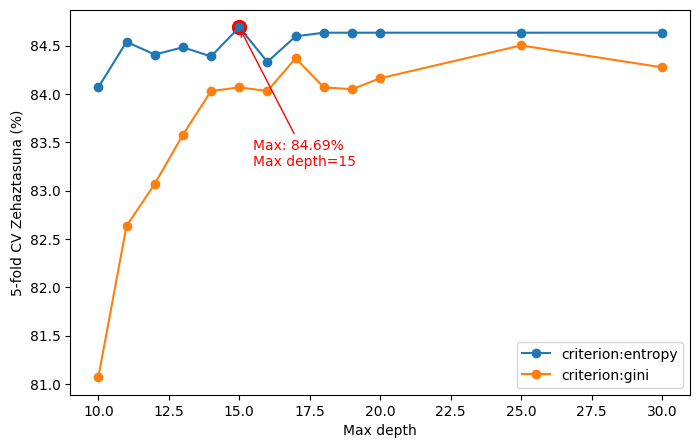

In [71]:
import matplotlib.pyplot as plt

depth_graf = depth_graf[:len(acc_graf)]


acc_percent_entropy = [a * 100 for a in acc_graf_entropy]
acc_percent_gini = [a * 100 for a in acc_graf_gini]
#acc_percent_log_loss = [a * 100 for a in acc_graf_log_loss]

max_idx = acc_percent_entropy.index(max(acc_percent_entropy))
max_depth = depth_graf[max_idx]
max_acc = acc_percent[max_idx]

plt.figure(figsize=(8,5))
plt.plot(depth_graf, acc_percent_entropy, marker='o', label='criterion:entropy')
plt.plot(depth_graf, acc_percent_gini, marker='o', label='criterion:gini')
#plt.plot(depth_graf, acc_percent_log_loss, marker='o', label='criterion:log loss')
plt.xlabel('Max depth')
plt.ylabel('5-fold CV Zehaztasuna (%)')


plt.scatter([max_depth], [max_acc], color='red', s=100,)
plt.annotate(f'Max: {max_acc:.2f}%\nMax depth={max_depth}', 
             xy=(max_depth, max_acc), 
             xytext=(10, -100), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10,
             color='red')

plt.legend()
plt.savefig('accuracy_rf.png')
plt.show()
